## Loading data products

- Load remote data for desired moorings
- Write data locally

Reproduce the contents of `ExampleCodeFromOHW22.ipynb` using functions in the `sa_upwelling` package.

In [1]:
import sys
from glob import glob
from pathlib import Path

sys.path.insert(0, "../sa_upwelling")   # Allows using the files in the Python package
import utils


from matplotlib import pyplot as plt

SA coastal moorings that are active: 
* SAM8SG
* SAM5CB

National Reference Station Kangaroo Island
* NRSKAI

SA coastal moorings that are not active but have data available:
* SAM2CP
* SAM6IS
* SAM3MS
* SAM7DS

**Notes:**
* Look at TS for details: https://imos.org.au/fileadmin/user_upload/shared/ANMN/SA_Moorings/06c._Southern_Australia_Moorings_-_TS.pdf
* Aggregate has data only from termistor
* Avoid CTD-derived data (look out for anomalies)


### Hourly time-series

In [2]:
hourly_files, hourly_ds = utils.load_data_products()

Loading local hourly-timeseries data for mooring 'NRSKAI'.
Loading local hourly-timeseries data for mooring 'SAM8SG'.
Loading local hourly-timeseries data for mooring 'SAM5CB'.
Loading local hourly-timeseries data for mooring 'SAM2CP'.
Loading local hourly-timeseries data for mooring 'SAM6IS'.
Loading local hourly-timeseries data for mooring 'SAM3MS'.
Loading local hourly-timeseries data for mooring 'SAM7DS'.


In [3]:
agg_files, agg_ds = utils.load_data_products(data_type="aggregated_timeseries",
                                     pattern="*TEMP-aggregated-timeseries_*.nc")

Loading local hourly-timeseries data for mooring 'NRSKAI'.
Loading local hourly-timeseries data for mooring 'SAM8SG'.
Loading local hourly-timeseries data for mooring 'SAM5CB'.
Loading local hourly-timeseries data for mooring 'SAM2CP'.
Loading local hourly-timeseries data for mooring 'SAM6IS'.
Loading local hourly-timeseries data for mooring 'SAM3MS'.
Loading local hourly-timeseries data for mooring 'SAM7DS'.


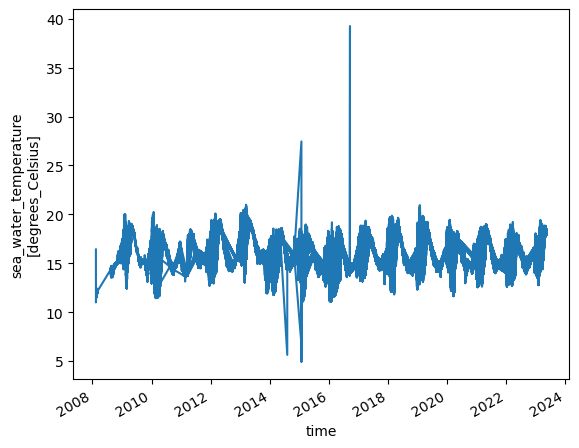

In [13]:
agg_ds["NRSKAI"]["TEMP"][agg_ds["NRSKAI"]["TEMP_quality_control"] == 1].plot(x="TIME")